<sub>Felix Becker, Lars Gabriel University of Greifswald, Germany</sub>
# Exercise Set 1 - 1

The potential of machine learning ultimatively comes from pattern detection in large amounts of data. However, before we can train a model and make predictions, we have to:
 - Analyse the raw data (which filetypes, how is the data organized?)
 - Read data file(s) into memory
 - Make statistical analyses (e.g. plots)  
 - Manipulate the data (reshape and mathematical operations), remove or add features
 
## Raw data

Inspect the file *bikes-summerdays-full.tbl*. How many datapoints and attributes are there? What delimiter is used? Has the file one or more header rows? Are there missing values?

*Tip: Double clicking the file in jupyter opens a CSVTable view. One can also open the file as raw text by right clicking $\rightarrow$ Open With $\rightarrow$ Editor.*

## Read the file



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the cell below, read the data file as a pandas dataframe called ``df``. Take care to handle the header line of the file correctly and use the right delimiter/separator.

In [3]:
df = pd.read_csv("../bikes-summerdays-full.csv", sep = ";")

In [7]:
df["temp"]

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

Print the following things:
- What is the shape of the dataframe?
- What are the datatypes of the columns "season" and "temp"?
- What is the maximum and minimum temperature?

In [4]:
print("df shape:", df.shape)
print("dtype season:", df["season"].dtype)
print("dtype temp:", df["temp"].dtype)
print("temp:", np.amin(df["temp"]), "-", np.amax(df["temp"]))
print("atemp:", np.amin(df["atemp"]), "-", np.amax(df["atemp"]))

df shape: (10886, 12)
dtype season: int64
dtype temp: float64
temp: 0.82 - 41.0
atemp: 0.76 - 45.455


The dataset contains dates that are rather useless if stored as strings. The following cell will convert *datetime* to a proper time format that allows the extraction of hours, days and month.

In [8]:
df["datetime"] = pd.DatetimeIndex(df["datetime"])
df["hour"] = [t.hour for t in df["datetime"]]
df["dayofweek"] = [t.dayofweek for t in df["datetime"]]
df["month"] = [t.month for t in df["datetime"]]

## Getting warm: Simple statistical analyses

The original data came with a description for each data column. Lets assume we don't have this description and want to find out what the encoding 1,2,3,4 for "season" means. 

- Print (a subset of) the values from the "season" column
- Use the helper function below to create boxplots for the temperatures of the 4 seasons and make a guess which number corresponds to which season.

*Tips (assuming X,Y are vectors of the same size):*
- *``X == i`` returns a boolean vector that has "true" on each position that matches i.*
- *use ``Y[X == i]`` to retrieve subsets*

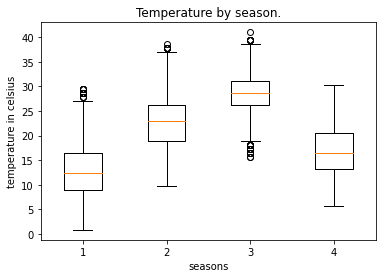

In [6]:
# expects data to be a list of length 4, where each entry is a np.array of temperatures
def boxplots(data):
    fig, ax = plt.subplots()
    ax.set_title("Temperature by season.")
    ax.set_xlabel("seasons")
    ax.set_ylabel("temperature in celsius")
    ax.boxplot(data)
    
# YOUR CODE STARTS
data = [df["temp"][df["season"] == i] for i in range(1,5)]
# YOUR CODE ENDS

boxplots(data)

## Create a datamatrix

Create a np matrix $X$ with the following columns:
- workingday, holiday
- normalized: windspeed, humidity, temp, atemp
- squares of temp and atemp
- one hot represented (!) weather and season
- hour, dayofweek, month (normalized to (0,1])

*Tip: Use the functions `to_one_hot` and `normalize`*

In [11]:
m = df.shape[0] #number of datapoints
n = 19 #number of attributes

X = np.zeros((m, n)) # initialize with all zeros

#assumes that classes is a vector of length m with elements in range 0,1,...,num_classes-1
#returns a matrix of shape (m, num_classes)
def to_one_hot(classes, num_classes):
    return np.eye(num_classes)[classes]

#assumes that X is a vector, returns a normalized X
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

#example:
X[:,0] = df["workingday"]

# YOUR CODE STARTS
# add the remaining columns X[:,1], X[:,2], ...
X[:,1] = df["holiday"]
X[:,2] = normalize(df["windspeed"])
X[:,3] = normalize(df["humidity"])
X[:,4] = normalize(df["temp"])
X[:,5] = normalize(df["atemp"])
X[:,6] = X[:,4]**2
X[:,7] = X[:,5]**2
X[:,8:12] = to_one_hot(df["weather"]-1, np.unique(df["weather"]).size)
X[:,12:16] = to_one_hot(df["season"]-1, np.unique(df["season"]).size)
X[:,16] = df["hour"] / 24
X[:,17] = df["dayofweek"] / 7
X[:,18] = df["month"] / 12
# YOUR CODE ENDS

X.shape

(10886, 19)

In [12]:
#save X to a (binary) file and use it later in another notebook
np.save("X", X)
#for convenience, also save y
np.save("y", df["count"])

## Outlook

Thats it for now. We will use $X$ later in the section for neural networks. But there is plenty to be learned before.